# Project 4 - Part 3: Exploratory data analysis and modelling mean salary

## [3.1 Import packages](#3.1)
## [3.2 Load data](#3.2)

## [3.3 Exploratory data analysis](#3.3)
### [3.3.1 Summary statistics](#3.3.1)
### [3.3.2 Target variable distribution](#3.3.2)
### [3.3.3 Correlations](#3.3.3)

## [3.4 Modelling factors that predict mean salary](#3.4)
### [3.4.1 Define predictor matrix and target variable](#3.4.1)
### [3.4.2 Straightforward linear regression modelling](#3.4.2)
### [3.4.3 Linear regression with regularization](#3.4.3)
### [3.4.4 Feature selection with Select K-best and Recursive feature elimination](#3.4.4)
### [3.4.5 Re-try linear modelling after feature elimination](#3.4.5)
### [3.4.6 Is linear regression modelling appropriate?](#3.4.6)
### [3.4.7 How well is the model performing?](#3.4.7)
### [3.4.8 What keywords have the greatest impact on salary?](#3.4.8)
### [3.4.9 Does it make more sense to binarize the data?](#3.4.9)

## [3.5 Classification modelling for salary class](#3.5)
### [3.5.1 Define variables for classification](#3.5.1)
### [3.5.2 Classification with K-nearest neighbors](#3.5.2)
### [3.5.3 Classification with support vector machines](#3.5.3)
### [3.5.4 Classification with decision trees](#3.5.4)
### [3.5.5 Classification model summary](#3.5.5)

## [3.6 Imputing values for full dataset](#3.6)

## <a id='3.1'>3.1 Import packages</a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## <a id='3.2'>3.2 Load data</a>

In [2]:
file = 'jobs_clean.csv'
jobs = pd.read_csv(file, index_col=0)

In [3]:
jobs.head(2)

,index,title,company,salary_low,salary_high,salary_mean,title_analyst,title_data,title_scientist,title_business,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
0,0,Data Engineer,Telstra,NaN,NaN,NaN,0.000000,0.489781,0.000000,0.0,...,1,1,0,0,1,0,0,0,0,1
1,1,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,NaN,NaN,0.268433,0.339808,0.475133,0.0,...,1,0,0,0,1,1,1,0,0,0


## <a id='3.3'>3.3 Exploratory Data Analysis</a>

### <a id='3.3.1'>3.3.1 Summary statistics</a>

In [4]:
#Let's begin by looking at the summary statistics
jobs.describe()

,index,salary_low,salary_high,salary_mean,title_analyst,title_data,title_scientist,title_business,title_senior,title_research,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
count,745.000000,135.000000,135.000000,135.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.0,745.000000,745.000000,745.000000,745.000000,745.000000
mean,604.127517,96706.703704,110150.696296,103428.700000,0.146133,0.142899,0.089737,0.052525,0.044792,0.034083,...,0.273826,0.080537,0.064430,0.096644,1.0,0.473826,0.193289,0.034899,0.053691,0.014765
std,376.799697,40459.034901,49004.828766,43405.974525,0.170123,0.223323,0.223825,0.170324,0.148749,0.129144,...,0.446220,0.272305,0.245681,0.295671,0.0,0.499650,0.395143,0.183648,0.225559,0.120692
min,0.000000,26000.000000,26000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.000000,70434.000000,80000.000000,75876.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,548.000000,88713.000000,100000.000000,91807.500000,0.133345,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,946.000000,116756.500000,130000.000000,125000.000000,0.224538,0.257444,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1255.000000,234000.000000,300000.000000,250000.000000,1.000000,0.784700,1.000000,0.901558,0.902902,0.914038,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The summary statistics tell us a few things, particularly about salary information. Firstly, that only a minority of our data actually has salary information (135 records out of 745 total). This may be a limitation for our modelling and predictions.

However, of the jobs that do list their salary information, a few descriptive statistics of note are apparent. Firstly, the average offered salary range for data science/analytics jobs in Australia is 96707 - 110151, with the average mean salary being 103429. Salary varies over a large range though, with the lowest paid jobs paying only 26000, while the highest amount potentially on offer is 300000.

### <a id='3.3.2'>3.3.2 Target variable distributions</a>

In [5]:
#Before we can look at distributions for the salary data, we need to limit our rows only to those which have values for salary
jobs_subset = jobs[jobs.salary_low.isnull() == False]
jobs_subset.shape

(135, 5056)

In [6]:
#How are the salary variables distributed?
def distribution(values, xlabel, title):
    fig = plt.figure(figsize=(6,4))
    sns.distplot(values, bins = 20,kde=False)
    plt.axvline(x=np.mean(values), linestyle='dashed', color='black', alpha=0.8)
    plt.axvline(x=np.median(values), linestyle='dashed', color = 'r', alpha=0.8)
    plt.ylabel('frequency')
    plt.xlabel(xlabel)
    plt.title(title)

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


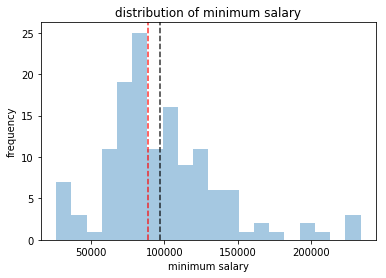

In [7]:
distribution(jobs_subset['salary_low'], 'minimum salary', 'distribution of minimum salary')

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


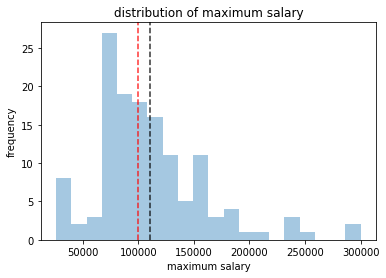

In [8]:
distribution(jobs_subset['salary_high'], 'maximum salary', 'distribution of maximum salary')

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


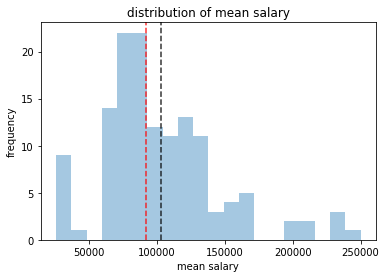

In [9]:
distribution(jobs_subset['salary_mean'], 'mean salary', 'distribution of mean salary')

Minimum, maximum and mean salary are all somewhat positively skewed. While most of the jobs listed are around the approximately 100k average, there are a few that are considerably lower and several that are much higher. The distribution of salaries is also discontinuous, with some gaps where there are no jobs listed in that area. I will attempt linear regression to predict this variable but I may have more success if I bin the salary variable into categories and attempt to classify jobs into these categories.

Let's look at some boxplots to get a closer look at these outliers.

Text(0,0.5,'annual salary (AUD)')

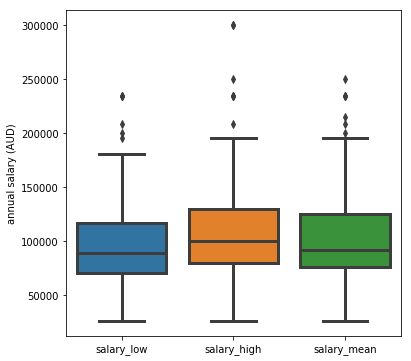

In [10]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(data=jobs_subset[['salary_low','salary_high','salary_mean']],orient='v', linewidth=3)
plt.ylabel('annual salary (AUD)')

The upper range of salaries has more extreme outliers than the other two variables, which makes sense. It's possible that higher-paid jobs have a wider pay range over which they are willing to negotiate. For this reason, I will stick with mean salary as my target variable.

### <a id='3.3.3'>3.3.3 Correlations</a>

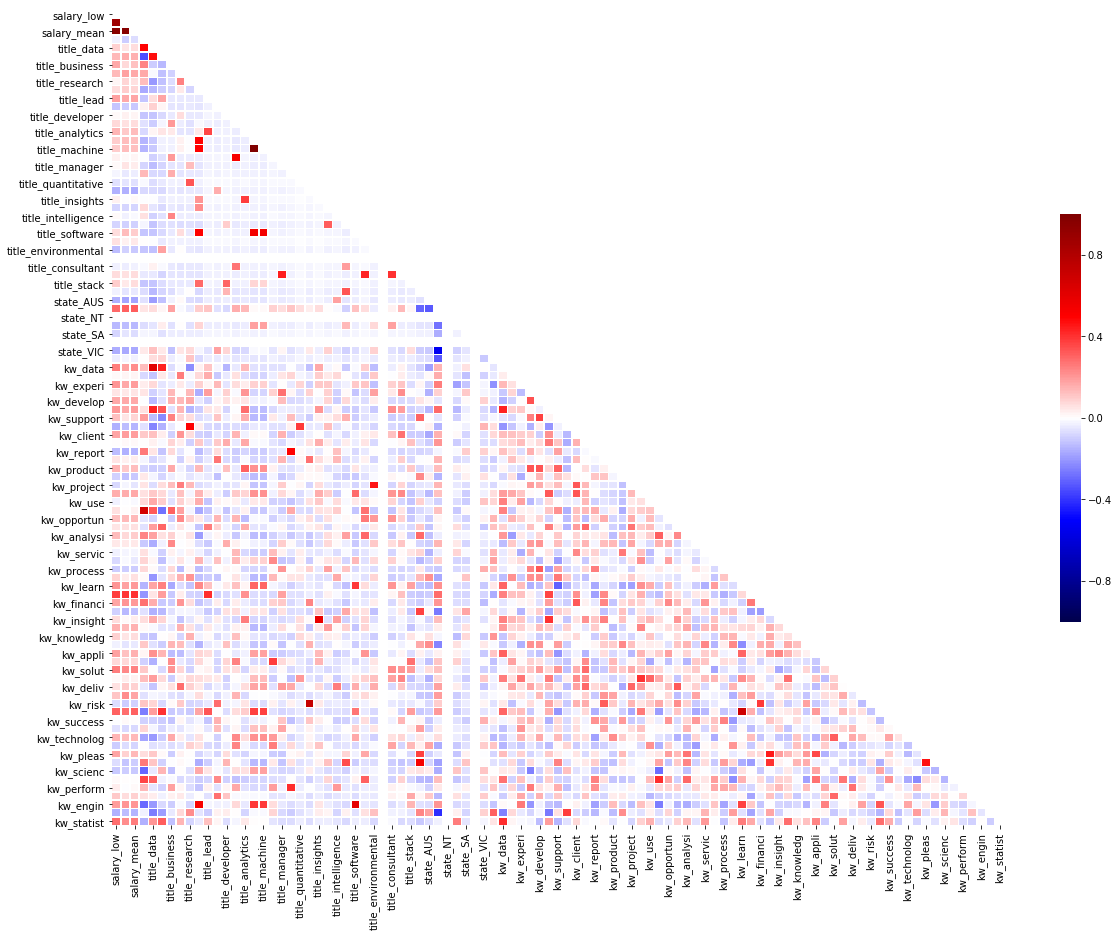

In [11]:
fig = plt.figure(figsize=(20,15))
#Calculate a correlation matrix for the numerical variables
correlations = jobs_subset.iloc[:,3:100].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Make the heatmap
sns.heatmap(correlations, mask = mask, vmin=-1, linewidths=.5, vmax=1, cmap='seismic',cbar_kws={"shrink": .5})

Firstly, the states negatively correlate with one another, which is to be expected given that a job is listed in one state only and so these values are mutually exclusive. There's not much we can do about this.

The salary variables are all strongly collinear, this is also to be expected and will not be an issue as I'll only be using the salary_mean column as a target variable.

A few other terms show collinearity that might be worth dealing with. Keywords 'machine' and 'learn' are highly correlated, suggesting that they're usually used in the phrase 'machine learning'. In this instance it might be a good idea to drop the 'machine' keyword variable, as this doesn't capture as much information as 'learn' which has a few other potential connotations in a data job listing. 'Environmental' in the job title also seems to correlate quite strongly with 'environment' in the summary, unsurprisingly. I will drop the kw_environment column here. These seem to be the most extreme instances of collinearity, and should be alleviated by dropping the columns 'title_machine', 'kw_machin' and 'kw_environment'.

## <a id='3.4'>3.4 Question 1: Modelling factors that predict mean salary</a>

What keywords in the job title and job summary predict salary? Does the location affect salary? I will first attempt to construct a linear model to predict mean salary from these variables.

### <a id='3.4.1'>3.4.1 Define predictor matrix and target variable</a>

In [12]:
#We'll start by defining a predictor matrix
X = jobs_subset.iloc[:,7:]
#Dropping the columns we found above to be collinear
dropcols = ['title_machine','kw_machin','kw_environment']
X.drop(dropcols,axis=1,inplace=True)

In [13]:
#And the target variable
y = jobs_subset['salary_mean']

In [14]:
#Now do a train-test split, leaving 1/3rd of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

In [15]:
#Standardize the predictors
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### <a id='3.4.2'>3.4.2 Straightforward linear regression modelling</a>

Prior to any feature selection or regularization, how does a linear model perform on this data?

In [16]:
#Fit the training data to a linear regression
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Define a function to get the r2 score for a given model and dataset
def get_r2(model,X,y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    return r2

In [18]:
#How good is the fit on the training data?
get_r2(lr, Xs_train, y_train)

1.0

In [19]:
#Evaluate the model on test data
get_r2(lr, Xs_test, y_test)

0.39235603684577847

Just going ahead and fitting these values to a linear regression model yielded a decent $r^2$ for the training data, but a much lower one fo the test data, suggesting the model is overfitting to the training data. Variance-reduction methods such as feature elimination or regularization may help with this issue.

### <a id='3.4.3'>3.4.3 Linear regression with regularization</a>

In [20]:
#Starting with ridge regularization, find the optimal alpha value using CV
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xs_train,y_train)
bestalpha = ridge.alpha_
bestalpha

870.3591361485165

In [21]:
optimalridge = Ridge(alpha = bestalpha)
optimalridge.fit(Xs_train,y_train)

Ridge(alpha=870.3591361485165, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
#Training r2
get_r2(optimalridge, Xs_train, y_train)

0.9216322114007929

In [23]:
#Testing r2
get_r2(optimalridge, Xs_test, y_test)

0.3679862946020439

Ridge regression does not improve the model significantly.

In [24]:
#Lasso regularization
lasso = LassoCV(alphas=np.logspace(0,5,200), cv=10)
lasso.fit(Xs_train, y_train)
bestalpha=lasso.alpha_
bestalpha

4659.525668664682

In [25]:
optimallasso = Lasso(alpha = bestalpha)
optimallasso.fit(Xs_train, y_train)

Lasso(alpha=4659.525668664682, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
#Training r2
get_r2(optimallasso, Xs_train, y_train)

0.8117793540494999

In [27]:
#Testing r2
get_r2(optimallasso, Xs_test, y_test)

0.09661941071828406

Lasso regression is not doing well either. Perhaps other approaches to feature elimination are needed.

### <a id='3.4.4'>3.4.4 Feature selection with Select K-best and Recursive feature elimination</a>

In [28]:
#Start with select k-best
select_f = SelectKBest(f_regression, k=10)
select_f.fit(Xs_train, y_train)


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SelectKBest(k=10, score_func=<function f_regression at 0x0000021C512F26A8>)

In [29]:
kbest = pd.DataFrame({'feature':list(X_train.columns), 'f_regression score':list(select_f.scores_)})

In [30]:
#What are the highest ranked features for select k best?
kbesttop30 = kbest.sort_values('f_regression score', ascending=False).head(50)
#kbesttop30 = kbesttop30[kbesttop30['f_classif score'] != inf]
kbesttop30

,feature,f_regression score
433,kw_idea,17.828580
585,kw_organ,16.881488
3386,kw_equ,16.881488
1376,kw_indepth,16.881488
3369,kw_cap,16.881488
1173,kw_transit,16.881488
599,kw_major,16.881488
1453,kw_entrepreneuri,16.881488
4975,kw_activitiesyour,16.881488
4069,kw_demanding,16.881488


Getting a lot of infinite values using select k best, perhaps RFECV will be a better approach.

In [31]:
#Now try RFECV
lr = LinearRegression()
selector = RFECV(lr, step=0.5, cv=10)
selector.fit(Xs_train, y_train)

rfe = pd.DataFrame({'feature':list(X_train.columns),'ranking':list(selector.ranking_),'support':list(selector.support_)})

In [32]:
#We'll also look at the top 10 ranked features for rfe
rfetop30 = rfe.sort_values('ranking',ascending=True).head(30)

In [33]:
#Let's use the features supported by RFECV
rfesupported = rfe[rfe['support']==True]
len(rfesupported)

2523

In [34]:
#We could also select features that appear in both lists
combined_features = list(set(kbesttop30.feature).intersection(rfesupported.feature))
print(combined_features)

['kw_multitask', 'kw_write', 'kw_advantages', 'kw_statement', 'kw_900', 'kw_opportunist', 'kw_equ', 'kw_explain', 'kw_random', 'kw_9249', 'kw_smal', 'kw_activitiesyour', 'kw_opensourc', 'kw_rebecca', 'kw_entir', 'kw_layer', 'kw_tree', 'kw_usage', 'kw_demanding', 'kw_problems', 'kw_themat', 'kw_ecommerc', 'kw_lead', 'kw_businesses', 'kw_resume', 'kw_forest', 'kw_domains', 'kw_today', 'kw_ward', 'kw_cap', 'kw_retail', 'kw_bank', 'kw_cosmetics', 'kw_text', 'kw_clustering', 'kw_tight', 'kw_idea', 'kw_communicator', 'kw_organ', 'kw_multitud', 'kw_teams', 'kw_analytical', 'kw_drawbacks', 'kw_prefer', 'kw_entrepreneuri', 'kw_8041', 'kw_transit', 'kw_pay', 'kw_indepth', 'kw_major']


### <a id='3.4.5'>3.4.5 Re-try linear modelling after feature elimination</a>

In [35]:
#Define new predictor matrix
Xsub = X[rfesupported.feature]
#Xsub = X[combined_features]
#Xsub = X[kbesttop30.feature]

#I did a lot of trial and error here to decide which set of selected features to use, in the end using the features supported
#by RFECV only yielded the best results.

In [36]:
#New test/train split
Xsub_train, Xsub_test, y_train, y_test = train_test_split(Xsub, y, test_size=0.5, random_state=11)

In [37]:
#Standardize new predictors
ss = StandardScaler()
Xsub_train = ss.fit_transform(Xsub_train)
Xsub_test = ss.transform(Xsub_test)

In [38]:
#Fit on a linear regression model again
lr = LinearRegression()
lr.fit(Xsub_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#Training r2
get_r2(lr, Xsub_train, y_train)

1.0

In [40]:
#Test r2
get_r2(lr, Xsub_test, y_test)

0.39576679502854917

Still over-fitted to the training data. Maybe if we combine this smaller predictor matrix with regularization we can improve the test score.

In [41]:
#Ridge
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xsub_train,y_train)
bestalpha = ridge.alpha_
optimalridge = Ridge(alpha = bestalpha)
optimalridge.fit(Xsub_train,y_train)

Ridge(alpha=775.2597488629465, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
#r2
print('train r2: ', get_r2(optimalridge, Xsub_train, y_train))
print('test r2: ', get_r2(optimalridge, Xsub_test, y_test))

train r2:  0.9329926186673902
test r2:  0.37226034272296993


In [43]:
#Lasso
lasso = LassoCV(alphas=np.logspace(0,5,200), cv=10)
lasso.fit(Xsub_train, y_train)
bestalpha=lasso.alpha_
optimallasso = Lasso(alpha = bestalpha)
optimallasso.fit(Xsub_train, y_train)

Lasso(alpha=4659.525668664682, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
#r2
print('train r2: ', get_r2(optimallasso, Xsub_train, y_train))
print('test r2: ', get_r2(optimallasso, Xsub_test, y_test))

train r2:  0.8117793540494999
test r2:  0.09661941071828428


In [45]:
#Elastic Net
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xsub_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xsub_train, y_train)

ElasticNet(alpha=21.497736789128407, copy_X=True, fit_intercept=True,
      l1_ratio=0.8762500000000001, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
#r2
print('train r2: ', get_r2(optimalenet, Xsub_train, y_train))
print('test r2: ', get_r2(optimalenet,Xsub_test, y_test))

train r2:  0.9927342067631603
test r2:  0.39558501910553234


No matter what I do, I seem to be getting significantly lower $r^2$ values for my test data. The best result I could achieve with some trial and error ended up being elastic net using RFECV for feature elimination, and I will use this model for further validation and evaluation.

### <a id='3.4.6'>3.4.6 Is linear regression modelling appropriate?</a>

Some of these issues may be due to violations of the assumptions of linear regression modelling.

In [47]:
y_hat = optimalenet.predict(Xsub_test)
residuals = y_test - y_hat

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


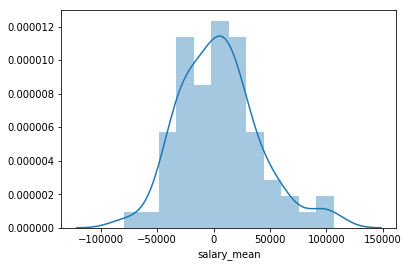

In [48]:
#Checking distribution of residuals
sns.distplot(residuals, bins=12)

The residuals of the target variable are slightly positively skewed but are still reasonably close to a normal distribution.

In [49]:
residuals.shape

(68,)

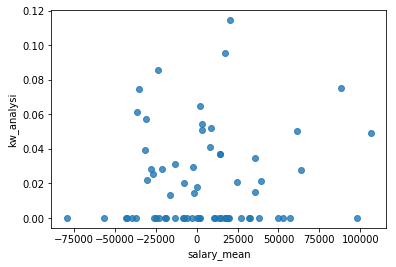

In [50]:
#Check for homoscedasticity.
sns.regplot(residuals, X_test['kw_analysi'], fit_reg=False)

Plotting residuals against various predictor variables doesn't show any obvious signs of heteroscedasticity, as there is no clear trend in the residuals as these variables increase. Suggesting the assumptions of linear regression aren't violated.

We handled multicollinearity by excluding the variables with the highest correlation above. So it seems that the assumptions of linear regression are not violated here and that this is not the problem with my model.

### <a id='3.4.7'>3.4.7 How well is the model performing?</a>

While the model is clearly over-fit to the training data, in order to properly evaluate how well it performs in general we need to compare its performance to a dummy regressor model.

In [51]:
from sklearn.dummy import DummyRegressor

In [52]:
dr = DummyRegressor()
dr.fit(Xsub_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [53]:
print('dummy r2: ', get_r2(dr, Xsub_test, y_test))
print('model r2: ', get_r2(optimalenet, Xsub_test, y_test))

dummy r2:  -0.019548204250124712
model r2:  0.39558501910553234


Text(0,0.5,'predicted values')

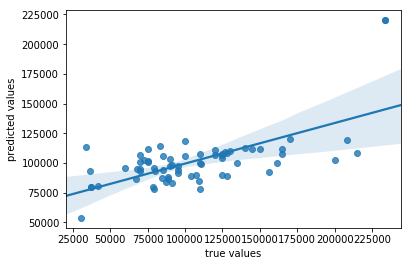

In [54]:
sns.regplot(y_test, y_hat)
plt.xlabel('true values')
plt.ylabel('predicted values')

In comparison to the dummy regressor, my linear model is performing relatively well, making predictions roughly 40% better than a baseline naive estimate.

### <a id='3.4.8'>3.4.8 What keywords have the greatest impact on salary?</a>

In [55]:
optimalenet.coef_
enetcoef = pd.DataFrame({'feature':Xsub.columns, 'coefficient':optimalenet.coef_, 'abs':abs(optimalenet.coef_)})
enetcoef.sort_values('coefficient', ascending=False).head(15)

,feature,coefficient,abs
1270,kw_entrepreneuri,569.289809,569.289809
1514,kw_multitask,569.287428,569.287428
1224,kw_indepth,569.286508,569.286508
573,kw_organ,569.285663,569.285663
586,kw_major,569.285481,569.285481
1056,kw_businesses,569.285135,569.285135
1074,kw_transit,569.284675,569.284675
2500,kw_activitiesyour,569.283943,569.283943
2125,kw_cap,569.283117,569.283117
2408,kw_smal,569.282994,569.282994


The keywords that have the biggest positive impact on predicted mean salary are listed above. Job listings that score highly on the word 'entrepreneurial' were more likely to have a higher predicted mean salary than those that don't. ('Scoring highly' in this context means having a higher tf-idf score for this word, that is that the job summary used this word more frequently than other job summaries). Other words such as 'businesses', 'cap (probably short for capital?) and 'equ'(short for equity?) also predicted higher salary, suggesting that perhaps private and financial sector jobs tend to have higher salaries. Interesting jobs that scored highly for both 'major' and 'small' had higher predicted mean salaries. It is possible context is important in this case, and possibly using ngrams to look at the words in context would be a useful future step. Words that indicate a high-pressure environment like 'multitask', 'demanding' and 'tight' also predicted a higher salary, suggesting that if you want a high paying job, be prepared for stress.

In [56]:
enetcoef.sort_values('coefficient', ascending=True).head(15)

,feature,coefficient,abs
2069,kw_assignments,-435.328143,435.328143
1567,kw_qlikview,-435.312779,435.312779
2382,kw_chip,-435.300532,435.300532
976,kw_oracl,-435.274318,435.274318
631,kw_academ,-377.973970,377.973970
2138,kw_blue,-376.416110,376.416110
7,title_junior,-358.147583,358.147583
370,kw_onli,-342.096485,342.096485
892,kw_https,-337.912971,337.912971
563,kw_increas,-314.702370,314.702370


As for those keywords that had a negative impact on predicted salary, a few noticeable trends are present. Understandably, the word 'junior' in both the summary and the job title predicted a lower salary. Amusingly, so did the words 'blue' and 'chip', suggesting that companies that self describe as 'blue chip' are perhaps not likely to pay as well. Disappointingly but in no way surprisingly, the keyword 'academic' also predicted a lower mean salary, suggesting that academic roles are not the most lucrative way to go in the data industry. It appears also that shorter-term contract work also negatively impacts predicted salary, with words like 'period', 'extend' and '6month' all being negative predictors as well.

### <a id='3.4.9'>3.4.9 Does it make more sense to binarize the data?</a>

Would it make more sense to just look for the presence of a word in the title/summary, regardless of how many times it appears? For example, specific skills might be important but only be mentioned once in the summary. Taking the tf-idf scores may be masking the importance of one-off words.

In [57]:
def binarizer(x):
    if x > 0:
        v = 1
    else:
        v = 0
    return v

In [58]:
Xbin = pd.DataFrame([X[column].apply(binarizer) for column in X.columns]).transpose()

In [59]:
Xbin_train, Xbin_test, y_train, y_test = train_test_split(Xsub, y, test_size=0.5, random_state=11)

In [60]:
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xbin_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xbin_train, y_train)

ElasticNet(alpha=1865.5755700327927, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [61]:
print('train r2: ', get_r2(optimalenet, Xbin_train, y_train))
print('test r2: ', get_r2(optimalenet,Xbin_test, y_test))

train r2:  0.15813098406200854
test r2:  0.1252773784549438


In terms of $r^2$ score, binarizing the data does not improve the performance of the model.

In [62]:
optimalenet.coef_
enetcoef = pd.DataFrame({'feature':Xsub.columns, 'coefficient':optimalenet.coef_, 'abs':abs(optimalenet.coef_)})
enetcoef.sort_values('abs', ascending=False).head(20)

,feature,coefficient,abs
30,state_NSW,18329.644875,18329.644875
2515,skill_python,13268.286001,13268.286001
0,title_data,-0.000000,0.000000
1685,kw_targets,-0.000000,0.000000
1678,kw_wellbeing,-0.000000,0.000000
1679,kw_prevent,0.000000,0.000000
1680,kw_sciences,-0.000000,0.000000
1681,kw_flex,-0.000000,0.000000
1682,kw_treatment,0.000000,0.000000
1683,kw_churn,-0.000000,0.000000


Overall, binarizing the data led to a model that does much better in terms of overfitting to the training data, but its overall performance is worse. Oddly, the only two features that impacted the prediction were being in the state NSW and listing python as a desired skill. Apparently this model predicts that if a job is in NSW and requires python skills, it's much more likely to pay well.

## <a id='3.5'>3.5 Classification modelling</a>

Regression modelling led to some interesting observations, but I had some doubts about the efficacy of the model. Given the discontinuous distribution of the salary data, is it easier to predict salary if we define three categories: low, medium and high?

In [63]:
#Create a function to classify salary as high (2), medium (1) or low (0)
def salary_classifier(salary):
    if salary > 120000:
        c = 2
    elif salary > 80000:
        c = 1
    else:
        c = 0
    return c

In [64]:
#Create a new column by applying this function to the mean salary column
jobs_subset['salary_class'] = jobs_subset['salary_mean'].apply(salary_classifier)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
#Are the classes balanced?
jobs_subset['salary_class'].value_counts()

1    50
0    46
2    39
Name: salary_class, dtype: int64

In [66]:
#What's the baseline accuracy?
baseline = len(jobs_subset[jobs_subset['salary_class'] == 1]) / len(jobs_subset['salary_class'])
baseline

0.37037037037037035

### <a id='3.5.1'>3.5.1 Define variables for classification</a>

In [67]:
#Define new predictor variable
y = jobs_subset['salary_class']

In [68]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 11, stratify=jobs_subset['salary_class'])

In [69]:
#Standardise X_train/X_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### <a id='3.5.2'>3.5.2 Classification with K-nearest neighbors</a>

In [70]:
#Conduct a GridSearch to find optimal hyperparameters for KNN
knn_params = {'n_neighbors':[1,3,5,9,15,18,21,25],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 9, 15, 18, 21, 25], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
#Fit a K-nearest neighbours model
knn = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}


In [72]:
#Compare knn model accuracy to baseline
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print('model accuracy: ', knn.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.39705882352941174
baseline accuracy:  0.37037037037037035


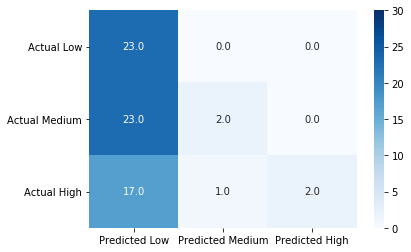

In [73]:
cm1 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

The KNN model accuracy is slightly better than baseline.

### <a id='3.5.3'>3.5.3 Classification with support vector machine</a>

In [74]:
#Gridsearch for optimal hyperparameters
svm = SVC()
gammas = np.logspace(-5, 2, 20)
Cs = np.logspace(-3, 2, 10)
kernels = ['rbf', 'sigmoid', 'linear', 'poly']
params = dict(gamma=gammas, C=Cs, kernel=kernels)
svm_gs = GridSearchCV(svm, params, cv=5, scoring='accuracy')
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00....15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02]), 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 27.825594022071257, 'gamma': 5.4555947811685143e-05, 'kernel': 'rbf'}


In [76]:
svm_pred = svm_best.predict(X_test)
svm_score = svm_best.score(X_test, y_test)
print('model accuracy: ', svm_best.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.6470588235294118
baseline accuracy:  0.37037037037037035


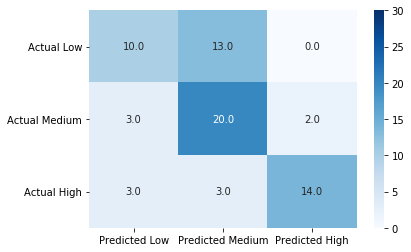

In [77]:
cm1 = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

### <a id='3.5.4'>3.5.4 Classification with decision trees</a>

In [78]:
#Gridsearch again for hyperparameters
params = {'max_depth':[3,4,5],
         'max_leaf_nodes':[2,3,4],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [2, 3, 4], 'min_samples_split': [2, 3, 4, 5, 10, 15, 25], 'max_features': [5, 10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 3, 'max_features': 100, 'max_leaf_nodes': 4, 'min_samples_split': 25}


In [80]:
dtc_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)
print('model accuracy: ', dtc.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.4117647058823529
baseline accuracy:  0.37037037037037035


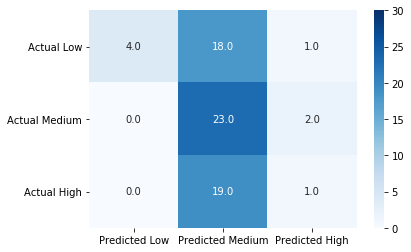

In [81]:
cm1 = confusion_matrix(y_test, dtc_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

In [83]:
#With bagging
bag = BaggingClassifier(dtc, max_samples=1.0,random_state=5)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=100, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=25, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=5, verbose=0, warm_start=False)

In [84]:
bag_pred = bag.predict(X_test)
bag_score = bag.score(X_test, y_test)
print('model accuracy: ', bag.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.5735294117647058
baseline accuracy:  0.37037037037037035


             precision    recall  f1-score   support

          0       0.76      0.57      0.65        23
          1       0.49      0.80      0.61        25
          2       0.60      0.30      0.40        20

avg / total       0.61      0.57      0.56        68



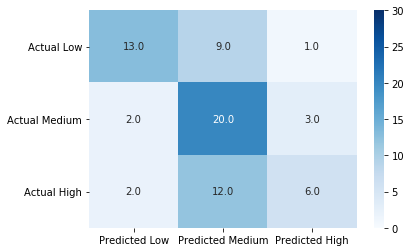

In [85]:
cm1 = confusion_matrix(y_test, bag_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])
print(classification_report(y_test,bag_pred))

In [86]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]
            }

rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 10}


In [87]:
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('model accuracy: ', rf.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.45588235294117646
baseline accuracy:  0.37037037037037035


             precision    recall  f1-score   support

          0       0.48      0.52      0.50        23
          1       0.48      0.44      0.46        25
          2       0.40      0.40      0.40        20

avg / total       0.46      0.46      0.46        68



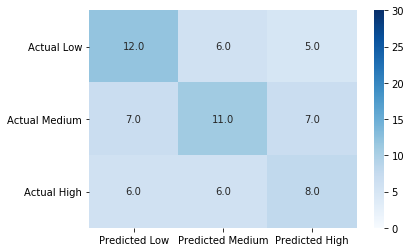

In [88]:
cm1 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])
print(classification_report(y_test,rf_pred))

### <a id='3.5.5'>3.5.5 Classification model summary</a>

In [89]:
models = ['KNN','SVM','DecisionTree','Bagging','RandomForest','Baseline']
accuracy = [knn_score, svm_score, dtc_score, bag_score,rf_score, baseline]
class_summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
class_summary = class_summary.set_index('Model')

In [90]:
class_summary

,Accuracy
Model,
KNN,0.397059
SVM,0.647059
DecisionTree,0.411765
Bagging,0.573529
RandomForest,0.455882
Baseline,0.370370


Support vector machines achieved the highest accuracy, with an ensemble bagging classifier achieving the second-highest accuracy. All of the classification models peformed better than baseline, although KNN only performed marginally better.

Unforunately, there is no simple way to extract feature weights or importances for either svm ('rbf' kernel was used so coefficients can't be extracted) or bagging classifier. The random forest model was the next most accurate so I will look at the feature importances from this model.

In [106]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature':X.columns, 'importance':importance}).sort_values('importance', ascending= False)
importance_df.head(10)

,feature,importance
80,kw_technolog,0.072559
523,kw_organisation,0.039502
11,title_learning,0.039368
56,kw_model,0.035691
99,kw_scientist,0.032832
555,kw_head,0.026365
166,kw_degre,0.025976
233,kw_transform,0.025120
291,kw_end,0.021645
194,kw_flexibl,0.020395


Both 'learning' in the job title and 'model' in the job summary appear to be important for classifying the salary level of the job, suggesting that carrying out machine learning and modelling affects the level of pay. 'Scientist' also appears in the list, suggesting that perhaps data scientist jobs (where one would likely be doing more machine learning) are typically in a different pay grade to other jobs. The keyword 'head' also appears, unsurprisingly, suggesting that leadership positions also have an impact on salary class.

## <a id='3.6'>3.6 Imputing values for full dataset</a>

Since a large number of rows in my original dataset were missing information for the salary, I can use the models above to attempt to impute values. One caveat here is that I am attempting to impute values to a large number of rows using models built on only a small minority of the total rows. Furthermore, none of my models achieved above 64% accuracy, so a large number of the predicted rows can be expected to be incorrect. While I will still go ahead and impute this data, I may elect to drop these variables in future modelling.

In [91]:
#Imputing mean salary using linear regression.
#Define null-value predictors
null_salary = jobs[jobs['salary_mean'].isnull()==True]
Xnull = null_salary.iloc[:,7:]
dropcols = ['title_machine','kw_machin','kw_environment']
Xnull.drop(dropcols, axis=1, inplace=True)
Xnull_sub = Xnull[rfesupported.feature]

In [92]:
#Predict mean salary using elastic net regression model
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xsub_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xsub_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.0017575209404221389, copy_X=True, fit_intercept=True,
      l1_ratio=0.17500000000000002, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
predicted = optimalenet.predict(Xnull_sub)

In [94]:
#Impute these values to the mean salary column
null_salary['salary_mean'] = predicted*100000

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
#Predict salary classes using bag ensemble model
predicted_class = svm_best.predict(Xnull)

In [96]:
#Impute to data frame
null_salary['salary_class'] = predicted_class
null_salary['salary_class'].value_counts()
#This is just applying one class to everything. This will not be useful for clustering and will likely be dropped.

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    610
Name: salary_class, dtype: int64

In [97]:
#Concatenate these with the rows that had pre-existing salary information to form a full dataset.
jobs_full = pd.concat([null_salary, jobs_subset])
jobs_full.set_index('index', inplace=True)

In [98]:
jobs_full.head()

,title,company,salary_low,salary_high,salary_mean,title_analyst,title_data,title_scientist,title_business,title_senior,...,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka,salary_class
index,,,,,,,,,,,,,,,,,,,,,
0,Data Engineer,Telstra,NaN,NaN,93703.231744,0.000000,0.489781,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,NaN,96583.608818,0.268433,0.339808,0.475133,0.0,0.0,...,0,0,0,1,1,1,0,0,0,0
2,Data Scientist,Nearmap - AU,NaN,NaN,94339.846850,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,Data Scientist,nbn™,NaN,NaN,95988.998849,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,Data Scientist,ResMed,NaN,NaN,95722.169606,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [99]:
#Export to a .csv file for use in question 2
filename = 'jobs_full.csv'
jobs_full.to_csv(filename)